In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:

df = pd.read_csv('/data/notebook_files/ICRISAT_Crops.csv')
df.replace(-1, 0, inplace=True)
print(df.head(5))

   Dist Code  Year  State Code State Name    Dist Name  RICE AREA (1000 ha)  \
0         72  1990           5  Karnataka  Chitradurga                58.61   
1         72  1991           5  Karnataka  Chitradurga                41.09   
2         72  1992           5  Karnataka  Chitradurga                71.19   
3         72  1993           5  Karnataka  Chitradurga                75.54   
4         72  1994           5  Karnataka  Chitradurga                73.94   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                       177.23                  3024.0                  0.69   
1                       105.15                  2559.0                  0.54   
2                       212.51                  2985.0                  0.49   
3                       220.67                  2921.0                  0.35   
4                       230.25                  3114.0                  0.33   

   WHEAT PRODUCTION (1000 tons)  ...  SUGARC

In [11]:
# Get the list of crops
crops = ['RICE', 'WHEAT', 'KHARIF SORGHUM', 'RABI SORGHUM', 'SORGHUM', 'PEARL MILLET', 
         'MAIZE', 'FINGER MILLET', 'BARLEY', 'CHICKPEA', 'PIGEONPEA', 'MINOR PULSES', 
         'GROUNDNUT', 'SESAMUM', 'RAPESEED AND MUSTARD', 'SAFFLOWER', 'CASTOR', 
         'LINSEED', 'SUNFLOWER', 'SOYABEAN', 'OILSEEDS', 'SUGARCANE', 'COTTON']


# Initialize an empty DataFrame to store results
results = pd.DataFrame(columns=['Year', 'Crop', 'Total Area', 'Total Production', 'Total Yield'])

In [12]:

# For each crop, calculate total area and production for each year across all districts
for crop in crops:
    area_col = crop + ' AREA (1000 ha)'
    prod_col = crop + ' PRODUCTION (1000 tons)'
    result = df.groupby('Year')[[area_col, prod_col]].sum().reset_index()
    result.columns = ['Year', crop + ' Total Area (1000 ha)', crop + ' Total Production (1000 tons)']
    if results.empty:
        results = result
    else:
        results = pd.merge(results, result, on='Year')

print(results)

    Year  RICE Total Area (1000 ha)  RICE Total Production (1000 tons)  \
0   1990                     101.00                             301.35   
1   1991                      83.19                             215.30   
2   1992                     120.49                             341.83   
3   1993                     129.03                             361.84   
4   1994                     132.84                             374.54   
5   1995                     127.28                             374.82   
6   1996                     134.02                             404.02   
7   1997                     130.73                             410.39   
8   1998                     197.49                             645.61   
9   1999                     213.48                             691.29   
10  2000                     217.10                             733.00   
11  2001                     204.13                             633.91   
12  2002                     157.41   

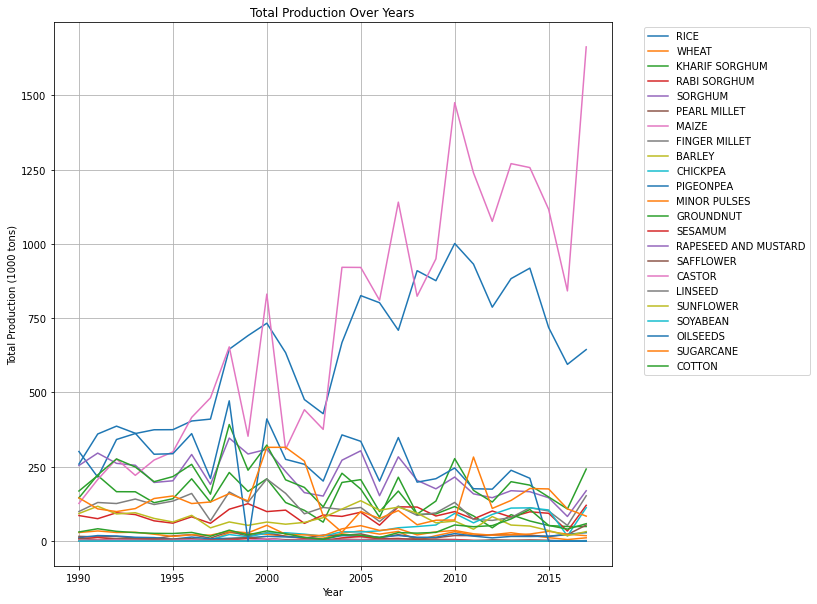

In [13]:
plt.figure(figsize=(10, 10))

for crop in crops:
    prod_col = crop + ' Total Production (1000 tons)'
    plt.plot(results['Year'], results[prod_col], label=crop)

plt.title('Total Production Over Years')
plt.xlabel('Year')
plt.ylabel('Total Production (1000 tons)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

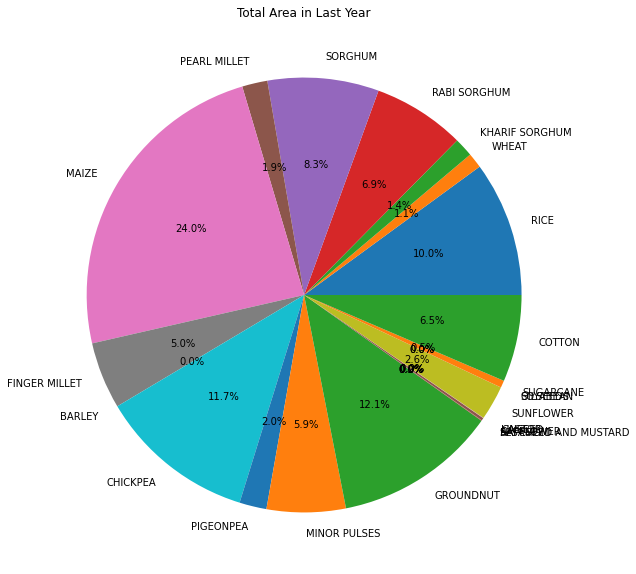

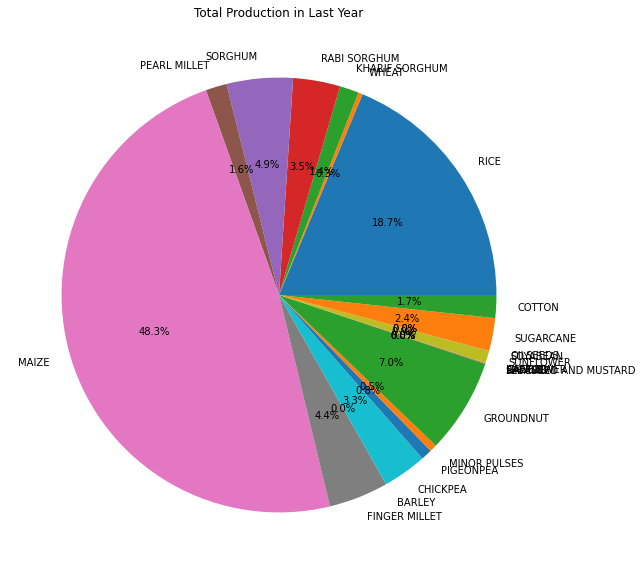

In [14]:
# Extract data for the last year
last_year = results['Year'].max()
last_year_data = results[results['Year'] == last_year]


area_data = [last_year_data[crop + ' Total Area (1000 ha)'].values[0] for crop in crops]
prod_data = [last_year_data[crop + ' Total Production (1000 tons)'].values[0] for crop in crops]

#  pie chart for area
plt.figure(figsize=(10, 10))
plt.pie(area_data, labels=crops, autopct='%1.1f%%')
plt.title('Total Area in Last Year')
plt.show()

#  pie chart for production
plt.figure(figsize=(10, 10))
plt.pie(prod_data, labels=crops, autopct='%1.1f%%')
plt.title('Total Production in Last Year')
plt.show()

In [16]:
# Extract data for the last year
last_year = df['Year'].max()
last_year_data = df[df['Year'] == last_year]

# Prepare data for the crops
area_cols = [crop + ' AREA (1000 ha)' for crop in crops]
prod_cols = [crop + ' PRODUCTION (1000 tons)' for crop in crops]

area_data = last_year_data[area_cols].sum()
prod_data = last_year_data[prod_cols].sum()

# Get top 5 crops by area and production
top_area_crops = area_data.nlargest(5).index.tolist()
top_prod_crops = prod_data.nlargest(5).index.tolist()

# Remove ' AREA (1000 ha)' and ' PRODUCTION (1000 tons)' from the names
top_area_crops = [crop.replace(' AREA (1000 ha)', '') for crop in top_area_crops]
top_prod_crops = [crop.replace(' PRODUCTION (1000 tons)', '') for crop in top_prod_crops]

print('Top 5 crops by area:', top_area_crops)
print('Top 5 crops by production:', top_prod_crops)

Top 5 crops by area: ['MAIZE', 'GROUNDNUT', 'CHICKPEA', 'RICE', 'SORGHUM']
Top 5 crops by production: ['MAIZE', 'RICE', 'GROUNDNUT', 'SORGHUM', 'FINGER MILLET']
